## Requirements:

In [96]:
pip install optuna

In [3]:
pip install optuna_integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 1.9 MB/s eta 0:00:00


In [4]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, mean_squared_error,
    mean_absolute_error, r2_score, mean_absolute_percentage_error
)
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import mode
import optuna
from itertools import product
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner


## Data:

In [8]:
df_2023_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2023_2024_Season.csv')
df_2022_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2022_2023_Season.csv')
df_2021_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2021_2022_Season.csv')
df_2020_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2020_2021_Season.csv')
df_2018_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2018_2019_Season.csv')

df_2023_2024_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2023_2024_WL.csv')
df_2022_2023_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2022_2023_WL.csv')
df_2021_2022_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2021_2022_WL.csv')
df_2020_2021_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2020_2021_WL.csv')
df_2019_2020_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2019_2020_WL.csv')
df_2018_2019_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2018_2019_WL.csv')
df_2017_2018_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2017_2018_WL.csv')
df_2016_2017_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2016_2017_WL .csv')
df_2015_2016_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2015_2016_WL.csv')
df_2014_2015_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2014_2015_WL.csv')
df_2013_2014_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2013_2014_WL.csv')
df_2012_2013_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2012_2013_WL.csv')
df_2011_2012_wl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/2011_2012_WL.csv')

df_2018_2019.drop(['FULL NAME'], axis=1, inplace = True)
df_teams_2018_2019 = df_2018_2019.copy()
df_teams_2018_2019.drop(['POS'], axis=1, inplace = True)
df_teams_2018_2019 = df_teams_2018_2019.rename(columns = {'ORtg': 'ORTG'})
df_teams_2018_2019 = df_teams_2018_2019.groupby(['TEAM']).mean()

df_2020_2021.drop(['FULL NAME'], axis=1, inplace = True)
df_teams_2020_2021 = df_2020_2021.copy()
df_teams_2020_2021.drop(['POS'], axis=1, inplace = True)
df_teams_2020_2021 = df_teams_2020_2021.rename(columns = {'ORtg': 'ORTG'})
df_teams_2020_2021 = df_teams_2020_2021.groupby(['TEAM']).mean()


df_2021_2022.drop(['FULL NAME'], axis=1, inplace = True)
df_teams_2021_2022 = df_2021_2022.copy()
df_teams_2021_2022.drop(['POS'], axis=1, inplace = True)
df_teams_2021_2022 = df_teams_2021_2022.groupby(['TEAM']).mean()

df_2022_2023.drop(['NAME'], axis=1, inplace = True)
df_teams_2022_2023 = df_2022_2023.copy()
df_teams_2022_2023.drop(['POS'], axis=1, inplace=True)
df_teams_2022_2023 = df_teams_2022_2023.rename(columns = {'ORtg': 'ORTG', 'DRtg':'DRTG'})
df_teams_2022_2023 = df_teams_2022_2023.groupby(['TEAM']).mean()


df_2023_2024.drop(['NAME'], axis=1, inplace = True)
df_teams_2023_2024 = df_2023_2024.copy()
df_teams_2023_2024.drop(['POS'], axis=1, inplace=True)
df_teams_2023_2024 = df_teams_2023_2024.rename(columns = {'ORtg': 'ORTG','DRtg':'DRTG'})
df_teams_2023_2024 = df_teams_2023_2024.groupby(['TEAM']).mean()

wl_2016_2017 = df_2016_2017_wl[['Team','Win Rate']].copy()
wl_2016_2017.rename(columns = {'Win Rate':'Total Win Percentage'}, inplace = True)

wl_2015_2016 = df_2015_2016_wl[['Team','WIN%']].copy()
wl_2015_2016.rename(columns = {'WIN%':'Total Win Percentage'}, inplace = True)

wl_2014_2015 = df_2014_2015_wl[['Team','WIN%']].copy()
wl_2014_2015.rename(columns = {'WIN%':'Total Win Percentage'}, inplace = True)

wl_2013_2014 = df_2013_2014_wl[['Team','WIN%']].copy()
wl_2013_2014.rename(columns = {'WIN%':'Total Win Percentage'}, inplace = True)

wl_2012_2013 = df_2012_2013_wl[['Team','WIN%']].copy()
wl_2012_2013.rename(columns = {'WIN%':'Total Win Percentage'}, inplace = True)

wl_2011_2012 = df_2011_2012_wl[['Team','WIN%']].copy()
wl_2011_2012.rename(columns = {'WIN%':'Total Win Percentage'}, inplace = True)

df_teams_2021_2022.shape

(30, 25)

In [9]:
df_teams_2021_2022.head()

,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,2P%,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
TEAM,,,,,,,,,,,,,,,,,,,,,
Atl,26.000417,36.833333,18.662500,38.854167,17.383333,9.962500,76.208333,0.688375,184.125000,0.484417,...,3.300000,9.816667,1.570833,12.212500,0.535833,0.290000,0.707500,6.066667,114.804348,108.095652
Bos,27.034286,31.571429,14.178571,29.542857,18.610714,9.988462,61.178571,0.593143,147.214286,0.451536,...,2.628571,9.064286,1.325000,10.489286,0.420714,0.320357,0.700357,5.553571,113.820000,101.770000
Bro,29.271667,35.916667,20.654167,43.012500,17.829167,12.504348,74.208333,0.625375,193.708333,0.482958,...,3.962500,12.504167,2.150000,12.333333,0.614583,0.465000,1.189167,6.750000,109.086957,106.621739
Cha,25.633158,44.157895,17.889474,37.268421,17.826316,11.294737,92.263158,0.660632,229.947368,0.489263,...,3.200000,8.842105,2.000000,13.200000,0.631053,0.355263,0.911579,6.531579,114.468750,108.650000
Chi,25.939091,38.090909,18.054545,37.631818,17.045455,13.804762,80.272727,0.643727,216.500000,0.532909,...,3.240909,11.131818,1.622727,9.677273,0.575909,0.310000,0.905000,5.700000,115.547368,107.436842


In [10]:
df_columns = df_teams_2021_2022.columns.to_list()
for column in df_columns:
  print(column)

AGE
GP
MPG
MIN%
USG%
TO%
FTA
FT%
2PA
2P%
3PA
3P%
eFG%
TS%
PPG
RPG
TRB%
APG
AST%
SPG
BPG
TOPG
VI
ORTG
DRTG


In [11]:
gaurd_df = df_2023_2024[(df_2023_2024['POS'] == 'G') | (df_2023_2024['POS'] == 'G-F')].copy()
forward_df = df_2023_2024[(df_2023_2024['POS']=='F') | (df_2023_2024['POS'] == 'F-C') | (df_2023_2024['POS'] == 'F-G')].copy()
center_df = df_2023_2024[(df_2023_2024['POS']=='C') | (df_2023_2024['POS']=='C-F')].copy()

gaurd_df.drop(['POS'], axis = 1, inplace = True)
forward_df.drop(['POS'], axis = 1, inplace = True)
center_df.drop(['POS'], axis = 1, inplace = True)

gaurd_df = gaurd_df.groupby(['TEAM']).mean()
forward_df = forward_df.groupby(['TEAM']).mean()
center_df = center_df.groupby(['TEAM']).mean()

gaurd_df = gaurd_df.reset_index()
forward_df = forward_df.reset_index()
center_df = center_df.reset_index()

wins = df_2023_2024_wl[df_2023_2024_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2023_2024_wl[df_2023_2024_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2023_2024 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2023_2024.loc[wl_2023_2024['Teams'] == 'Nol', 'Teams'] = 'Nor'

combined_positions_df = pd.merge(gaurd_df, forward_df, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_guard', '_forward'))
combined_positions_df = pd.merge(combined_positions_df, center_df, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_forward', '_center'))
combined_positions_df = pd.merge(combined_positions_df, df_teams_2023_2024, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_center', '_team'))


season_2023_2024 = pd.merge(combined_positions_df, wl_2023_2024, left_on='TEAM', right_on='Teams', how='left')
nan_columns = season_2023_2024.isna().sum()
nan_columns.sort_values(ascending=False)
season_2023_2024[season_2023_2024['Total Win Percentage'].isna()]
season_2023_2024.shape


(30, 107)

In [12]:
columns = season_2023_2024.columns.tolist()
for column in columns:
  print(column)

TEAM
RANK_guard
AGE_guard
GP_guard
MPG_guard
USG%_guard
TO%_guard
FTA_guard
FT%_guard
2PA_guard
2P%_guard
3PA_guard
3P%_guard
eFG%_guard
TS%_guard
PPG_guard
RPG_guard
APG_guard
SPG_guard
BPG_guard
TPG_guard
P+R_guard
P+A_guard
P+R+A_guard
VI_guard
ORtg_guard
DRtg_guard
RANK_forward
AGE_forward
GP_forward
MPG_forward
USG%_forward
TO%_forward
FTA_forward
FT%_forward
2PA_forward
2P%_forward
3PA_forward
3P%_forward
eFG%_forward
TS%_forward
PPG_forward
RPG_forward
APG_forward
SPG_forward
BPG_forward
TPG_forward
P+R_forward
P+A_forward
P+R+A_forward
VI_forward
ORtg_forward
DRtg_forward
RANK_center
AGE_center
GP_center
MPG_center
USG%_center
TO%_center
FTA_center
FT%_center
2PA_center
2P%_center
3PA_center
3P%_center
eFG%_center
TS%_center
PPG_center
RPG_center
APG_center
SPG_center
BPG_center
TPG_center
P+R_center
P+A_center
P+R+A_center
VI_center
ORtg
DRtg
RANK_team
AGE_team
GP_team
MPG_team
USG%_team
TO%_team
FTA_team
FT%_team
2PA_team
2P%_team
3PA_team
3P%_team
eFG%_team
TS%_team
PPG_team

In [13]:
gaurd_df2 = df_2022_2023[(df_2022_2023['POS']=='G') | (df_2022_2023['POS'] == 'G-F')].copy()
forward_df2 = df_2022_2023[(df_2022_2023['POS']=='F') | (df_2022_2023['POS'] == 'F-C') | (df_2022_2023['POS'] == 'F-G')].copy()
center_df2 = df_2022_2023[(df_2022_2023['POS']=='C') | (df_2022_2023['POS']=='C-F')].copy()

gaurd_df2.drop(['POS'], axis = 1, inplace = True)
forward_df2.drop(['POS'], axis = 1, inplace = True)
center_df2.drop(['POS'], axis = 1, inplace = True)

gaurd_df2 = gaurd_df2.groupby(['TEAM']).mean()
forward_df2 = forward_df2.groupby(['TEAM']).mean()
center_df2 = center_df2.groupby(['TEAM']).mean()

gaurd_df2 = gaurd_df2.reset_index()
forward_df2 = forward_df2.reset_index()
center_df2 = center_df2.reset_index()

wins = df_2022_2023_wl[df_2022_2023_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2022_2023_wl[df_2022_2023_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2022_2023 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2022_2023.loc[wl_2022_2023['Teams'] == 'Nol', 'Teams'] = 'Nor'


combined_positions_df2 = pd.merge(gaurd_df2, forward_df2, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_guard', '_forward'))
combined_positions_df2 = pd.merge(combined_positions_df2, center_df2, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_forward', '_center'))
combined_positions_df2 = pd.merge(combined_positions_df2, df_teams_2022_2023, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_center', '_team'))

seasons_2022_2023 = pd.merge(combined_positions_df2, wl_2022_2023, left_on='TEAM', right_on='Teams', how='left')
seasons_2022_2023.shape

(30, 107)

In [14]:
gaurd_df3 = df_2021_2022[(df_2021_2022['POS']=='G') | (df_2021_2022['POS']=='G-F')].copy()
forward_df3 = df_2021_2022[(df_2021_2022['POS']=='F') | (df_2021_2022['POS']=='F-G') | (df_2021_2022['POS']=='F-C')].copy()
center_df3 = df_2021_2022[(df_2021_2022['POS']=='C') | (df_2021_2022['POS']=='C-F')].copy()

gaurd_df3.drop(['POS'], axis = 1, inplace = True)
forward_df3.drop(['POS'], axis = 1, inplace = True)
center_df3.drop(['POS'], axis = 1, inplace = True)

gaurd_df3 = gaurd_df3.groupby(['TEAM']).mean()
forward_df3 = forward_df3.groupby(['TEAM']).mean()
center_df3 = center_df3.groupby(['TEAM']).mean()

gaurd_df3 = gaurd_df3.reset_index()
forward_df3 = forward_df3.reset_index()
center_df3 = center_df3.reset_index()

wins = df_2021_2022_wl[df_2021_2022_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2021_2022_wl[df_2021_2022_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2021_2022 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2021_2022.loc[wl_2021_2022['Teams'] == 'Nol', 'Teams'] = 'Nor'

combined_positions_df3 = pd.merge(gaurd_df3, forward_df3, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_guard', '_forward'))
combined_positions_df3 = pd.merge(combined_positions_df3, center_df3, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_forward', '_center'))
combined_positions_df3 = pd.merge(combined_positions_df3, df_teams_2021_2022, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_center', '_team'))

seasons_2021_2022 = pd.merge(combined_positions_df3, wl_2021_2022, left_on='TEAM', right_on='Teams', how='left')
seasons_2021_2022.shape

(30, 103)

In [15]:
gaurd_df5 = df_2020_2021[(df_2020_2021['POS']=='G') | (df_2020_2021['POS']=='G-F')].copy()
forward_df5 = df_2020_2021[(df_2020_2021['POS']=='F') | (df_2020_2021['POS']=='F-G') | (df_2020_2021['POS']=='F-C')].copy()
center_df5 = df_2020_2021[(df_2020_2021['POS']=='C') | (df_2020_2021['POS']=='C-F')].copy()

gaurd_df5.drop(['POS'], axis = 1, inplace = True)
forward_df5.drop(['POS'], axis = 1, inplace = True)
center_df5.drop(['POS'], axis = 1, inplace = True)

gaurd_df5 = gaurd_df5.groupby(['TEAM']).mean()
forward_df5 = forward_df5.groupby(['TEAM']).mean()
center_df5 = center_df5.groupby(['TEAM']).mean()

gaurd_df5 = gaurd_df5.reset_index()
forward_df5 = forward_df5.reset_index()
center_df5 = center_df5.reset_index()

wins = df_2020_2021_wl[df_2020_2021_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2020_2021_wl[df_2020_2021_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2020_2021 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2020_2021.loc[wl_2020_2021['Teams'] == 'Nol', 'Teams'] = 'Nor'

combined_positions_df5 = pd.merge(gaurd_df5, forward_df5, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_guard', '_forward'))
combined_positions_df5 = pd.merge(combined_positions_df5, center_df5, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_forward', '_center'))
combined_positions_df5 = pd.merge(combined_positions_df5, df_teams_2020_2021, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_center', '_team'))

seasons_2020_2021 = pd.merge(combined_positions_df5, wl_2020_2021, left_on='TEAM', right_on='Teams', how='left')
seasons_2020_2021.shape


(30, 103)

In [16]:
wins = df_2019_2020_wl[df_2019_2020_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2019_2020_wl[df_2019_2020_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2019_2020 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2019_2020.loc[wl_2019_2020['Teams'] == 'Nol', 'Teams'] = 'Nor'


In [17]:
gaurd_df4 = df_2018_2019[(df_2018_2019['POS']=='G') | (df_2018_2019['POS']=='G-F')].copy()
forward_df4 = df_2018_2019[(df_2018_2019['POS']=='F') | (df_2018_2019['POS']=='F-G') | (df_2018_2019['POS']=='F-C')].copy()
center_df4 = df_2018_2019[(df_2018_2019['POS']=='C') | (df_2018_2019['POS']=='C-F')].copy()

gaurd_df4.drop(['POS'], axis = 1, inplace = True)
forward_df4.drop(['POS'], axis = 1, inplace = True)
center_df4.drop(['POS'], axis = 1, inplace = True)

gaurd_df4 = gaurd_df4.groupby(['TEAM']).mean()
forward_df4 = forward_df4.groupby(['TEAM']).mean()
center_df4 = center_df4.groupby(['TEAM']).mean()

gaurd_df4 = gaurd_df4.reset_index()
forward_df4 = forward_df4.reset_index()
center_df4 = center_df4.reset_index()

wins = df_2018_2019_wl[df_2018_2019_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2018_2019_wl[df_2018_2019_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2018_2019 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2018_2019.loc[wl_2018_2019['Teams'] == 'Nol', 'Teams'] = 'Nor'


combined_positions_df4 = pd.merge(gaurd_df4, forward_df4, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_guard', '_forward'))
combined_positions_df4 = pd.merge(combined_positions_df4, center_df4, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_forward', '_center'))
combined_positions_df4 = pd.merge(combined_positions_df4, df_teams_2018_2019, left_on='TEAM', right_on='TEAM', how='outer', suffixes=('_center', '_team'))

seasons_2018_2019 = pd.merge(combined_positions_df4, wl_2018_2019, left_on='TEAM', right_on='Teams', how='left')
wl_2018_2019.columns

Index(['Teams', 'Total Win Percentage'], dtype='object')

In [18]:
wins = df_2017_2018_wl[df_2017_2018_wl['Teams'].str.contains('Win')].set_index('Teams')
played = df_2017_2018_wl[df_2017_2018_wl['Teams'].str.contains('Played')].set_index('Teams')
win_percentages = wins.div(played.values)

win_percentages.index = win_percentages.index.str.replace(' Win', '', regex=False)
win_percentage_df = win_percentages.rename(columns=lambda x: f"{x} Win Percentage").reset_index()
win_percentage_df['Total Win Percentage'] = win_percentage_df.iloc[:, 1:].mean(axis=1)

wl_2017_2018 = win_percentage_df.drop(win_percentage_df.columns[1:-1], axis=1)
wl_2017_2018.loc[wl_2017_2018['Teams'] == 'Nol', 'Teams'] = 'Nor'

In [19]:
combos_df = pd.concat([season_2023_2024, seasons_2022_2023, seasons_2021_2022, seasons_2020_2021, seasons_2018_2019],join = 'inner', axis = 0)

column_list = combos_df.columns.tolist()

column_list
combos_df.shape

(150, 75)

In [20]:
combos_df.head()

,TEAM,AGE_guard,GP_guard,MPG_guard,USG%_guard,FTA_guard,FT%_guard,2PA_guard,2P%_guard,3PA_guard,...,eFG%_team,TS%_team,PPG_team,RPG_team,APG_team,SPG_team,BPG_team,VI_team,Teams,Total Win Percentage
0,Atl,27.945455,38.545455,18.563636,16.909091,84.909091,0.634364,196.272727,0.502273,191.636364,...,0.519895,0.549211,9.205263,3.647368,2.110526,0.631579,0.384211,6.542105,Atl,0.448276
1,Bos,25.685714,42.714286,17.085714,15.657143,43.285714,0.763857,146.142857,0.548143,190.571429,...,0.577474,0.604684,8.526316,3.521053,1.889474,0.573684,0.505263,7.747368,Bos,0.781034
2,Bro,26.366667,32.333333,20.911111,19.477778,78.222222,0.639444,198.222222,0.399667,138.888889,...,0.490048,0.520333,8.295238,3.576190,2.252381,0.595238,0.409524,7.252381,Bro,0.359195
3,Cha,25.775000,26.083333,19.041667,20.250000,40.500000,0.824333,116.500000,0.432250,83.750000,...,0.506577,0.539538,9.300000,3.530769,2.446154,0.661538,0.400000,6.911538,Cha,0.255747
4,Chi,27.357143,48.142857,24.485714,17.985714,83.428571,0.657429,238.857143,0.481429,231.000000,...,0.502722,0.526222,8.961111,3.700000,1.827778,0.650000,0.416667,6.027778,Chi,0.482759


## XGBoost:

In [21]:
X = combos_df.drop(['TEAM','Teams','Total Win Percentage'], axis = 1)
y = combos_df['Total Win Percentage']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train initial XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance.head(10))
print()

# Find optimal number of features
min_rmse = float('inf')
best_N = 0

for i in range(5, 50):
    N = i
    top_features = feature_importance['feature'][:N].tolist()

    X_train_selected = X_train_scaled[:, [X_train.columns.get_loc(feat) for feat in top_features]]
    X_test_selected = X_test_scaled[:, [X_test.columns.get_loc(feat) for feat in top_features]]

    xgb_model_selected = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model_selected.fit(X_train_selected, y_train)

    y_pred_selected = xgb_model_selected.predict(X_test_selected)
    rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))

    if rmse_selected < min_rmse:
        min_rmse = rmse_selected
        best_N = N

print(f"Best RMSE with selected features: {min_rmse:.5f} with N = {best_N}")

top_features = feature_importance['feature'][:best_N].tolist()
X_train_best = X_train_scaled[:, [X_train.columns.get_loc(feat) for feat in top_features]]
X_test_best = X_test_scaled[:, [X_test.columns.get_loc(feat) for feat in top_features]]

final_xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
final_xgb_model.fit(X_train_best, y_train)

y_pred_final = final_xgb_model.predict(X_test_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"Final RMSE: {final_rmse:.5f}")

# 1. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# 2. MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred_final)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# 3. R-squared (R²)
r2 = r2_score(y_test, y_pred_final)
print(f'R-squared (R²): {r2:.4f}')

# 4. MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, y_pred_final)
print(f"MAPE: {mape}")

Top 10 most important features:
        feature  importance
56     MPG_team    0.280298
54     AGE_team    0.109911
31  RPG_forward    0.060271
14    APG_guard    0.048143
1      GP_guard    0.041832
24  2PA_forward    0.032790
13    RPG_guard    0.030397
47   TS%_center    0.028470
46  eFG%_center    0.028410
42   2PA_center    0.025875

Best RMSE with selected features: 0.10169 with N = 36
Final RMSE: 0.10169
Root Mean Squared Error (RMSE): 0.1017
Mean Absolute Error (MAE): 0.0783
R-squared (R²): 0.5188
MAPE: 0.21113488973166103


In [22]:
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

top_features = feature_importance['feature'][:best_N].tolist()
X_train_best = X_train_scaled[:, [X_train.columns.get_loc(feat) for feat in top_features]]
X_test_best = X_test_scaled[:, [X_test.columns.get_loc(feat) for feat in top_features]]

final_xgb_model = xgb.XGBRegressor(
#  """  n_estimators=435,          # Number of trees (boosting rounds)
#    learning_rate= 0.1632572748296711,         # Step size shrinkage
#    max_depth=4,               # Maximum depth of a tree
#                               # Minimum loss reduction required to make a further partition
#    subsample=0.808290287660529,               # Proportion of training data used for each tree
#    colsample_bytree= 0.8617546545236596,   """     # Proportion of features used for each tree

    n_estimators =  835,
    max_depth= 7,
    min_child_weight= 7,
    gamma= 1.2950802765652561e-05,
    learning_rate= 0.12353162018020437,

    subsample= 0.7360764117054126,
    colsample_bytree= 0.8117425077542262,
    colsample_bylevel= 0.6551566099071588,
    reg_alpha= 0.0005806627814764604,
    reg_lambda= 2.2102545458857806e-05,
)

final_xgb_model.fit(X_train_scaled, y_train)

y_pred_final = final_xgb_model.predict(X_test_scaled)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"Final RMSE: {final_rmse:.5f}")

Final RMSE: 0.12137


In [23]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_final,
    'Difference': abs(y_pred_final - y_test)
})

print(comparison_df.sort_values(by='Difference', ascending=True))



      Actual  Predicted  Difference
22  0.620690   0.622515    0.001826
8   0.258621   0.262185    0.003564
18  0.431034   0.422202    0.008833
11  0.566092   0.543717    0.022375
26  0.295977   0.265368    0.030609
18  0.428161   0.468398    0.040237
4   0.566092   0.609394    0.043302
25  0.511494   0.467158    0.044336
0   0.500000   0.544888    0.044888
15  0.563218   0.509518    0.053700
25  0.571839   0.517910    0.053929
13  0.425287   0.479346    0.054059
18  0.600575   0.543572    0.057003
12  0.603448   0.545946    0.057502
21  0.485632   0.550140    0.064508
19  0.592529   0.522432    0.070096
16  0.609195   0.538465    0.070730
8   0.497126   0.577570    0.080444
20  0.310345   0.396870    0.086525
9   0.586207   0.681839    0.095632
14  0.545977   0.449256    0.096721
12  0.643678   0.543178    0.100500
28  0.735632   0.633050    0.102582
7   0.666667   0.552371    0.114296
9   0.660920   0.536049    0.124871
23  0.238506   0.396112    0.157607
6   0.428161   0.612694    0

In [24]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return {
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'mape': mape
    }

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'random_state': 42
    }


    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    metrics_list = []

    X_train_np = X_train_scaled.values if isinstance(X_train_scaled, (pd.DataFrame, pd.Series)) else X_train_scaled
    y_train_np = y_train.values if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_np)):
        X_fold_train = X_train_np[train_idx]
        y_fold_train = y_train_np[train_idx]
        X_fold_val = X_train_np[val_idx]
        y_fold_val = y_train_np[val_idx]

        eval_set = [(X_fold_val, y_fold_val)]

        model = xgb.XGBRegressor(
            **params,
            early_stopping_rounds=50,
            callbacks=[
                optuna.integration.XGBoostPruningCallback(trial, "validation_0-rmse")
            ]
        )

        model.fit(
            X_fold_train, y_fold_train,
            eval_set=eval_set,
            verbose=False
        )

        y_pred = model.predict(X_fold_val)
        fold_metrics = calculate_metrics(y_fold_val, y_pred)
        metrics_list.append(fold_metrics)

        trial.report(fold_metrics['rmse'], fold)
        if trial.should_prune():
            raise optuna.TrialPruned()

    avg_metrics = {
        metric: np.mean([m[metric] for m in metrics_list])
        for metric in metrics_list[0].keys()
    }

    trial.set_user_attr('mae', avg_metrics['mae'])
    trial.set_user_attr('r2', avg_metrics['r2'])
    trial.set_user_attr('mape', avg_metrics['mape'])

    return avg_metrics['rmse']

pruner = optuna.pruners.MedianPruner(
    n_startup_trials=5,
    n_warmup_steps=10,
    interval_steps=1
)

study = optuna.create_study(
    direction='minimize',
    pruner=pruner,
    study_name='xgboost_win_rate_prediction'
)

study.optimize(objective, n_trials=100)

print('\nBest trial:')
trial = study.best_trial
print('RMSE: {:.4f}'.format(trial.value))
print('MAE: {:.4f}'.format(trial.user_attrs['mae']))
print('R²: {:.4f}'.format(trial.user_attrs['r2']))
print('MAPE: {:.4f}%'.format(trial.user_attrs['mape']))
print('\nBest parameters:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

try:
    import plotly.graph_objects as go

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=list(range(len(study.trials))),
        y=[t.value for t in study.trials],
        mode='markers',
        name='RMSE'
    ))
    fig.update_layout(
        title='Optimization History',
        xaxis_title='Trial',
        yaxis_title='RMSE'
    )
    fig.show()
except ImportError:
    print("\nInstall plotly to visualize optimization history")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:497: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:497: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:497: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:497: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:497: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:497: UserWarning: The reported 


Best trial:
RMSE: 0.0977
MAE: 0.0774
R²: 0.4880
MAPE: 18.6527%

Best parameters:
    max_depth: 9
    min_child_weight: 5
    gamma: 2.551130867562889e-06
    learning_rate: 0.2301581104427413
    n_estimators: 2135
    subsample: 0.7705253951419013
    colsample_bytree: 0.75719259129396
    colsample_bylevel: 0.821196603653971
    reg_alpha: 3.775194269132127e-07
    reg_lambda: 7.159302971480776e-06


## Neural Network:

In [26]:
team_maps = {
   'Mil': 1610612749,  # Milwaukee Bucks
   'Tor': 1610612761,  # Toronto Raptors
   'Gol': 1610612744,  # Golden State Warriors
   'Den': 1610612743,  # Denver Nuggets
   'Hou': 1610612745,  # Houston Rockets
   'Por': 1610612757,  # Portland Trail Blazers
   'Phi': 1610612755,  # Philadelphia 76ers
   'Uta': 1610612762,  # Utah Jazz
   'Bos': 1610612738,  # Boston Celtics
   'Okc': 1610612760, # Oklahoma City Thunder
   'Ind': 1610612754, # Indiana Pacers
   'Lac': 1610612746, # Los Angeles Clippers
   'San': 1610612759, # San Antonio Spurs
   'Bro': 1610612751, # Brooklyn Nets
   'Orl': 1610612753, # Orlando Magic
   'Det': 1610612765, # Detroit Pistons
   'Cha': 1610612766, # Charlotte Hornets
   'Mia': 1610612748, # Miami Heat
   'Sac': 1610612758, # Sacramento Kings
   'Lal': 1610612747, # Los Angeles Lakers
   'Min': 1610612750, # Minnesota Timberwolves
   'Dal': 1610612742, # Dallas Mavericks
   'Mem': 1610612763, # Memphis Grizzlies
   'Nor': 1610612740, # New Orleans Pelicans
   'Was': 1610612764, # Washington Wizards
   'Atl': 1610612737, # Atlanta Hawks
   'Chi': 1610612741, # Chicago Bulls
   'Cle': 1610612739, # Cleveland Cavaliers
   'Pho': 1610612756, # Phoenix Suns
   'Nyk': 1610612752 # New York Knicks
}

team_id_map = {v: k for k, v in team_maps.items()}


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NBA Game Predictor/DS/test_new_df.csv')
filtered_df = df[df['GAME_DATE_EST'] > '2011-09-01']
filtered_df['HOME_TEAM'] = filtered_df['HOME_TEAM_ID'].replace(team_id_map)
filtered_df['VISITOR_TEAM'] = filtered_df['VISITOR_TEAM_ID'].replace(team_id_map)

filtered_df.drop(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID','GAME_ID'], inplace=True)


filtered_df['GAME_DATE_EST'] = pd.to_datetime(filtered_df['GAME_DATE_EST'])

season_mapping = {
    '2011-2012': {pd.to_datetime('2011-09-01'), pd.to_datetime('2012-06-30')},
    '2012-2013': {pd.to_datetime('2012-09-01'), pd.to_datetime('2013-06-30')},
    '2013-2014': {pd.to_datetime('2013-09-01'), pd.to_datetime('2014-06-30')},
    '2014-2015': {pd.to_datetime('2014-09-01'), pd.to_datetime('2015-06-30')},
    '2015-2016': {pd.to_datetime('2015-09-01'), pd.to_datetime('2016-06-30')},
    '2016-2017': {pd.to_datetime('2016-09-01'), pd.to_datetime('2017-06-30')},
    '2017-2018': (pd.to_datetime('2017-09-01'), pd.to_datetime('2018-06-30')),
    '2018_2019': (pd.to_datetime('2018-09-01'), pd.to_datetime('2019-06-30')),
    '2019_2020': (pd.to_datetime('2019-09-01'), pd.to_datetime('2020-06-30')),
    '2020_2021': (pd.to_datetime('2020-09-01'), pd.to_datetime('2021-06-30')),
    '2021_2022': (pd.to_datetime('2021-09-01'), pd.to_datetime('2022-06-30'))
}

filtered_df['SEASON'] = filtered_df['GAME_DATE_EST'].apply(
    lambda x: next((season for season, (start, end) in season_mapping.items()
                    if start <= x <= end), None))


team_win_map_2017_2018 = wl_2017_2018.set_index('Teams')['Total Win Percentage'].to_dict()
team_win_map_2018_2019 = wl_2018_2019.set_index('Teams')['Total Win Percentage'].to_dict()
team_win_map_2019_2020 = wl_2019_2020.set_index('Teams')['Total Win Percentage'].to_dict()
team_win_map_2020_2021 = wl_2020_2021.set_index('Teams')['Total Win Percentage'].to_dict()
team_win_map_2021_2022 = wl_2021_2022.set_index('Teams')['Total Win Percentage'].to_dict()

team_win_map_2016_2017 = wl_2016_2017.set_index('Team')['Total Win Percentage'].to_dict()
team_win_map_2015_2016 = wl_2015_2016.set_index('Team')['Total Win Percentage'].to_dict()
team_win_map_2014_2015 = wl_2014_2015.set_index('Team')['Total Win Percentage'].to_dict()
team_win_map_2013_2014 = wl_2013_2014.set_index('Team')['Total Win Percentage'].to_dict()
team_win_map_2012_2013 = wl_2012_2013.set_index('Team')['Total Win Percentage'].to_dict()
team_win_map_2011_2012 = wl_2011_2012.set_index('Team')['Total Win Percentage'].to_dict()

filtered_df.loc[filtered_df['SEASON'] == '2017-2018', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2017-2018', 'HOME_TEAM'].map(team_win_map_2017_2018)
filtered_df.loc[filtered_df['SEASON'] == '2017-2018', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2017-2018', 'VISITOR_TEAM'].map(team_win_map_2017_2018)

filtered_df.loc[filtered_df['SEASON'] == '2018_2019', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2018_2019', 'HOME_TEAM'].map(team_win_map_2018_2019)
filtered_df.loc[filtered_df['SEASON'] == '2018_2019', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2018_2019', 'VISITOR_TEAM'].map(team_win_map_2018_2019)

filtered_df.loc[filtered_df['SEASON'] == '2019_2020', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2019_2020', 'HOME_TEAM'].map(team_win_map_2019_2020)
filtered_df.loc[filtered_df['SEASON'] == '2019_2020', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2019_2020', 'VISITOR_TEAM'].map(team_win_map_2019_2020)

filtered_df.loc[filtered_df['SEASON'] == '2020_2021', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2020_2021', 'HOME_TEAM'].map(team_win_map_2020_2021)
filtered_df.loc[filtered_df['SEASON'] == '2020_2021', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2020_2021', 'VISITOR_TEAM'].map(team_win_map_2020_2021)

filtered_df.loc[filtered_df['SEASON'] == '2021_2022', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2021_2022', 'HOME_TEAM'].map(team_win_map_2021_2022)
filtered_df.loc[filtered_df['SEASON'] == '2021_2022', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2021_2022', 'VISITOR_TEAM'].map(team_win_map_2021_2022)

filtered_df.loc[filtered_df['SEASON'] == '2016-2017', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2016-2017', 'HOME_TEAM'].map(team_win_map_2016_2017)
filtered_df.loc[filtered_df['SEASON'] == '2016-2017', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2016-2017', 'VISITOR_TEAM'].map(team_win_map_2016_2017)

filtered_df.loc[filtered_df['SEASON'] == '2015-2016','HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2015-2016','HOME_TEAM'].map(team_win_map_2015_2016)
filtered_df.loc[filtered_df['SEASON'] == '2015-2016','VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2015-2016', 'VISITOR_TEAM'].map(team_win_map_2015_2016)

filtered_df.loc[filtered_df['SEASON'] == '2014-2015', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2014-2015', 'HOME_TEAM'].map(team_win_map_2014_2015)
filtered_df.loc[filtered_df['SEASON'] == '2014-2015', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2014-2015', 'VISITOR_TEAM'].map(team_win_map_2014_2015)

filtered_df.loc[filtered_df['SEASON'] == '2013-2014', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2013-2014', 'HOME_TEAM'].map(team_win_map_2013_2014)
filtered_df.loc[filtered_df['SEASON'] == '2013-2014', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2013-2014', 'VISITOR_TEAM'].map(team_win_map_2013_2014)

filtered_df.loc[filtered_df['SEASON'] == '2012-2013', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2012-2013', 'HOME_TEAM'].map(team_win_map_2012_2013)
filtered_df.loc[filtered_df['SEASON'] == '2012-2013', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2012-2013', 'VISITOR_TEAM'].map(team_win_map_2012_2013)

filtered_df.loc[filtered_df['SEASON'] == '2011-2012', 'HOME_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2011-2012', 'HOME_TEAM'].map(team_win_map_2011_2012)
filtered_df.loc[filtered_df['SEASON'] == '2011-2012', 'VISITOR_WIN_OVERALL'] = filtered_df.loc[filtered_df['SEASON'] == '2011-2012', 'VISITOR_TEAM'].map(team_win_map_2011_2012)

df_cleaned = filtered_df.dropna()
df_cleaned.drop(columns=['GAME_DATE_EST','SEASON', 'GAME_DATE_EST_away_last5', 'GAME_DATE_EST_home_last5'], inplace=True)
df_cleaned.drop(columns=['PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'AST_away', 'REB_away'], inplace=True)
shuffled_df = df_cleaned.copy()


"""
from google.colab import files

 #Save the DataFrame to a CSV file
shuffled_df.to_csv('shuffled_df.csv', index=False)

# Download the CSV file
files.download('shuffled_df.csv')"""



shuffled_df.shape

<ipython-input-26-faea29791dd5>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-faea29791dd5>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-faea29791dd5>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-faea29791dd5>:45: SettingWithCopyWarning:


A value is trying

(12349, 27)

In [27]:
y = shuffled_df['HOME_TEAM_WINS']

X = shuffled_df.drop(columns=['HOME_TEAM_WINS']).select_dtypes(include=['number'])
X = X.select_dtypes(exclude=['datetime64'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.15)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.5896 - loss: 0.7578 - val_accuracy: 0.8043 - val_loss: 0.4842
Epoch 2/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7448 - loss: 0.5271 - val_accuracy: 0.8516 - val_loss: 0.3631
Epoch 3/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8041 - loss: 0.4351 - val_accuracy: 0.8637 - val_loss: 0.3236
Epoch 4/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8185 - loss: 0.4064 - val_accuracy: 0.8792 - val_loss: 0.3018
Epoch 5/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8323 - loss: 0.3808 - val_accuracy: 0.8772 - val_loss: 0.2937
Epoch 6/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8386 - loss: 0.3715 - val_accuracy: 0.8772 - val_loss: 0.2917
Epoch 7/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3558 - val_accuracy: 0.8779 - val_loss: 0.2887
Epoch 8/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.3473 - val_acc

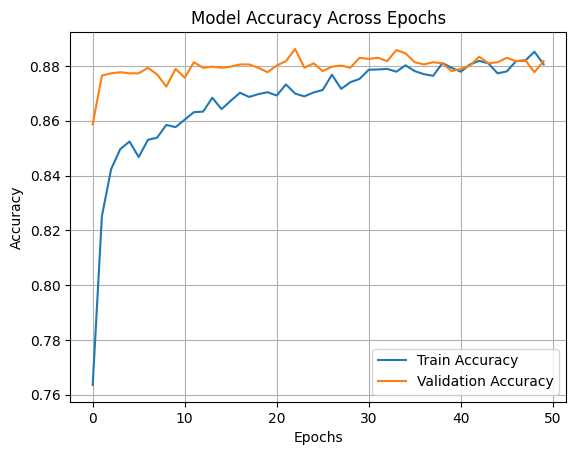

In [31]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [29]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kfold.split(X_train_scaled, y_train):
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_cv.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_cv, y_train_cv, epochs=250, batch_size=64, validation_data=(X_val_cv, y_val_cv), verbose=0)

    val_accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    cv_scores.append(val_accuracy[1])

print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Cross-Validation Accuracy: 0.8728 ± 0.0062


In [ ]:
y = shuffled_df['HOME_TEAM_WINS']
X = shuffled_df.drop(columns=['HOME_TEAM_WINS']).select_dtypes(include=['number'])
X = X.select_dtypes(exclude=['datetime64'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model = Sequential()

        model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32),
                        activation='relu', input_shape=(X_train_scaled.shape[1],)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

        model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

        model.add(Dense(hp.Int('units_3', min_value=16, max_value=64, step=16), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer=Adam(learning_rate=hp.Float('lr', min_value=1e-5, max_value=1e-3, sampling='log')),
                      loss='binary_crossentropy', metrics=['accuracy'])

        return model

tuner = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")


print("Best Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

Trial 10 Complete [00h 03m 49s]
val_accuracy: 0.8803094824155172

Best val_accuracy So Far: 0.8817306160926819
Total elapsed time: 01h 02m 47s
 1/66 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 



66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Best Model Performance:
Accuracy: 0.8834675509237329
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       904
           1       0.91      0.88      0.90      1207

    accuracy                           0.88      2111
   macro avg       0.88      0.88      0.88      2111
weighted avg       0.88      0.88      0.88      2111

Best Hyperparameters: {'units_1': 96, 'dropout_1': 0.4, 'units_2': 64, 'dropout_2': 0.30000000000000004, 'units_3': 48, 'dropout_3': 0.2, 'lr': 0.0006842507100027634}


In [35]:
best_hyperparameters = {
    'units_1': 96,
    'dropout_1': 0.4,
    'units_2': 64,
    'dropout_2': 0.3,
    'units_3': 48,
    'dropout_3': 0.2,
    'lr': 0.0006842507100027634
}

model_nn_best = Sequential()

model_nn_best.add(Dense(best_hyperparameters['units_1'], activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_nn_best.add(BatchNormalization())
model_nn_best.add(Dropout(best_hyperparameters['dropout_1']))

model_nn_best.add(Dense(best_hyperparameters['units_2'], activation='relu'))
model_nn_best.add(BatchNormalization())
model_nn_best.add(Dropout(best_hyperparameters['dropout_2']))

model_nn_best.add(Dense(best_hyperparameters['units_3'], activation='relu'))
model_nn_best.add(BatchNormalization())
model_nn_best.add(Dropout(best_hyperparameters['dropout_3']))

model_nn_best.add(Dense(1, activation='sigmoid'))

model_nn_best.compile(optimizer=Adam(learning_rate=best_hyperparameters['lr']),
              loss='binary_crossentropy', metrics=['accuracy'])

history = model_nn_best.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

y_pred_prob = model_nn_best.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Best Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.6569 - loss: 0.6653 - val_accuracy: 0.8502 - val_loss: 0.3500
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8057 - loss: 0.4296 - val_accuracy: 0.8648 - val_loss: 0.3021
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8241 - loss: 0.3913 - val_accuracy: 0.8696 - val_loss: 0.2922
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8363 - loss: 0.3638 - val_accuracy: 0.8725 - val_loss: 0.2895
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8463 - loss: 0.3545 - val_accuracy: 0.8725 - val_loss: 0.2823
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8523 - loss: 0.3404 - val_accuracy: 0.8757 - val_loss: 0.2804
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8508 - loss: 0.3460 - val_accuracy: 0.8761 - val_loss: 0.2819
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8589 - loss: 0.3338 - val_accuracy: 

##XGBoost for predicting match outcome:

In [36]:
y_XGBoost = shuffled_df['HOME_TEAM_WINS'] ## Creating new model to predict match outcomes to compare
## XGBoost model

X_XGBoost = shuffled_df.drop(columns=['HOME_TEAM_WINS']).select_dtypes(include=['number'])
X_XGBoost = X_XGBoost.select_dtypes(exclude=['datetime64'])

X_Train_XGBoost, X_Test_XGBoost, y_Train_XGBoost, y_Test_XGBoost = train_test_split(
    X_XGBoost, y_XGBoost, test_size=0.2, random_state=42, stratify=y_XGBoost
)

scaler_XGBoost = StandardScaler()
X_Train_Scaled_XGBoost = scaler_XGBoost.fit_transform(X_Train_XGBoost)
X_Test_Scaled_XGBoost = scaler_XGBoost.transform(X_Test_XGBoost)

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(X_Train_Scaled_XGBoost, y_Train_XGBoost)

y_Pred_XGBoost = xgb_model.predict(X_Test_Scaled_XGBoost)

accuracy_XGBoost = accuracy_score(y_Test_XGBoost, y_Pred_XGBoost)
print(f"Accuracy: {accuracy_XGBoost:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_Test_XGBoost, y_Pred_XGBoost))

print("\nClassification Report:")
print(classification_report(y_Test_XGBoost, y_Pred_XGBoost))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:31:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.8765

Confusion Matrix:
[[ 887  163]
 [ 142 1278]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1050
           1       0.89      0.90      0.89      1420

    accuracy                           0.88      2470
   macro avg       0.87      0.87      0.87      2470
weighted avg       0.88      0.88      0.88      2470



In [40]:
## Around the same as NN
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define parameters
param_distributions = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 5, 6),
    'min_child_weight': np.arange(1, 10),
}

random_search_XGBoost = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring=make_scorer(accuracy_score),
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
## Hyperparameter tuning, finding best hyperparams

random_search_XGBoost.fit(X_Train_Scaled_XGBoost, y_Train_XGBoost)

print("Best Hyperparameters:")
print(random_search_XGBoost.best_params_)

print(f"Best Cross-Validation Accuracy: {random_search_XGBoost.best_score_:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:35:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Hyperparameters:
{'subsample': 0.8, 'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1388888888888889, 'gamma': 5.0, 'colsample_bytree': 0.7}
Best Cross-Validation Accuracy: 0.8720


In [41]:
#Best final model
best_parameters_XGBoost = {
    'subsample': 0.8,
    'n_estimators': 250,
    'min_child_weight': 3,
    'max_depth': 3,
    'learning_rate': 0.1388888888888889,
    'gamma': 5.0,
    'colsample_bytree': 0.7
}

best_model_XGBoost = xgb.XGBClassifier(
    subsample=best_parameters_XGBoost['subsample'],
    n_estimators=best_parameters_XGBoost['n_estimators'],
    max_depth=best_parameters_XGBoost['max_depth'],
    learning_rate=best_parameters_XGBoost['learning_rate'],
    gamma=best_parameters_XGBoost['gamma'],
    colsample_bytree=best_parameters_XGBoost['colsample_bytree'],
    random_state=42,
    use_label_encoder=False
)

best_model_XGBoost.fit(X_Train_Scaled_XGBoost, y_Train_XGBoost)
y_Pred_Best_XGBoost = best_model_XGBoost.predict(X_Test_Scaled_XGBoost)

best_accuracy_XGBoost = accuracy_score(y_Test_XGBoost, y_Pred_Best_XGBoost)
print(f"Best Model Accuracy: {best_accuracy_XGBoost:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_Test_XGBoost, y_Pred_Best_XGBoost))

print("\nClassification Report:")
print(classification_report(y_Test_XGBoost, y_Pred_Best_XGBoost, target_names=['Loss', 'Win']))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:36:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Model Accuracy: 0.8810

Confusion Matrix:
[[ 892  158]
 [ 136 1284]]

Classification Report:
              precision    recall  f1-score   support

        Loss       0.87      0.85      0.86      1050
         Win       0.89      0.90      0.90      1420

    accuracy                           0.88      2470
   macro avg       0.88      0.88      0.88      2470
weighted avg       0.88      0.88      0.88      2470



<Figure size 1000x600 with 0 Axes>

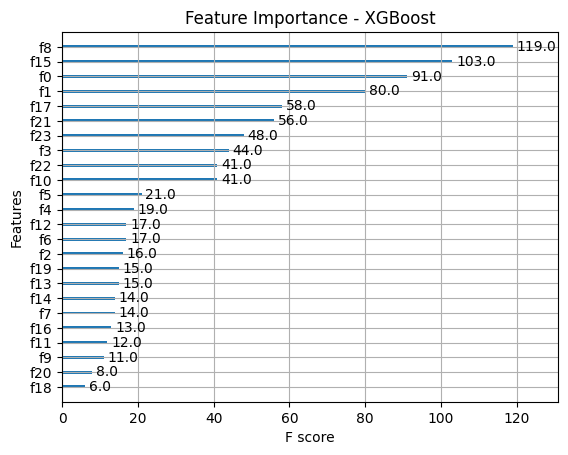

In [44]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model_XGBoost, importance_type='weight')
plt.title("Feature Importance - XGBoost")
plt.show()
## Feature f18 is the worst

In [49]:
## Testing to see if removing features benefits the model
X_Train_No18 = X_Train_XGBoost.drop(X_Train_XGBoost.columns[17], axis=1)
X_Test_No18 = X_Test_XGBoost.drop(X_Test_XGBoost.columns[17], axis=1)

best_model_XGBoost_NoF18 = xgb.XGBClassifier(
    subsample=best_parameters_XGBoost['subsample'],
    n_estimators=best_parameters_XGBoost['n_estimators'],
    max_depth=best_parameters_XGBoost['max_depth'],
    learning_rate=best_parameters_XGBoost['learning_rate'],
    gamma=best_parameters_XGBoost['gamma'],
    colsample_bytree=best_parameters_XGBoost['colsample_bytree'],
    random_state=42,
    use_label_encoder=False
)

best_model_XGBoost_NoF18.fit(X_Train_No18, y_Train_XGBoost)

y_Pred_NoF18 = best_model_XGBoost_NoF18.predict(X_Test_No18)

accuracy_no_f18 = accuracy_score(y_Test_XGBoost, y_Pred_NoF18)
print(f"Model Accuracy without 'f18': {accuracy_no_f18:.4f}")

print("\nConfusion Matrix without 'f18':")
print(confusion_matrix(y_Test_XGBoost, y_Pred_NoF18))

print("\nClassification Report without 'f18':")
print(classification_report(y_Test_XGBoost, y_Pred_NoF18, target_names=['Loss', 'Win']))
print("MODEL WITHOUT FEATURE 18")
## Results are not better

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:44:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Model Accuracy without 'f18': 0.8781

Confusion Matrix without 'f18':
[[ 894  156]
 [ 145 1275]]

Classification Report without 'f18':
              precision    recall  f1-score   support

        Loss       0.86      0.85      0.86      1050
         Win       0.89      0.90      0.89      1420

    accuracy                           0.88      2470
   macro avg       0.88      0.87      0.88      2470
weighted avg       0.88      0.88      0.88      2470

MODEL WITHOUT FEATURE 18


##Logistic Regression

In [50]:
y_logistic = shuffled_df['HOME_TEAM_WINS']
X_logistic = shuffled_df.drop(columns=['HOME_TEAM_WINS']).select_dtypes(include=['number'])
X_logistic = X_logistic.select_dtypes(exclude=['datetime64'])
## New model to compare - logistic regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42, stratify=y_logistic
)

scaler = StandardScaler()
X_train_scaled_logistic = scaler.fit_transform(X_train_logistic)
X_test_scaled_logistic = scaler.transform(X_test_logistic)

logistic_model = LogisticRegression(
    penalty='l2',           # L2 regularization
    solver='lbfgs',         # Optimizer
    max_iter=1000,          # Increase max iterations to ensure convergence
    random_state=42
)

logistic_model.fit(X_train_scaled_logistic, y_train_logistic)

y_pred_logistic = logistic_model.predict(X_test_scaled_logistic)

accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"Accuracy: {accuracy_logistic:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_logistic, y_pred_logistic))

print("\nClassification Report:")
print(classification_report(y_test_logistic, y_pred_logistic))


Accuracy: 0.8749

Confusion Matrix:
[[ 878  172]
 [ 137 1283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1050
           1       0.88      0.90      0.89      1420

    accuracy                           0.87      2470
   macro avg       0.87      0.87      0.87      2470
weighted avg       0.87      0.87      0.87      2470



In [51]:
coefficients = logistic_model.coef_[0]
features = X_train.columns

feature_importance = sorted(zip(features, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Displays most important features
print("\nFeature Importance (Top 10):")
for feature, coef in feature_importance[:10]:
    print(f"{feature}: {coef:.4f}")




Feature Importance (Top 10):
WIN_RECORD_away_last5: -1.8202
WIN_RECORD: 1.8188
FG3_PCT_home: 1.1425
FG3_PCT_away: -1.0826
away_road_record: 0.6883
home_home_record: -0.6714
FG3_PCT_home_home_last5: -0.5218
FG3_PCT_away_away_last5: 0.4550
VISITOR_WIN_OVERALL: -0.4480
HOME_WIN_OVERALL: 0.4437


ROC-AUC: 0.9514


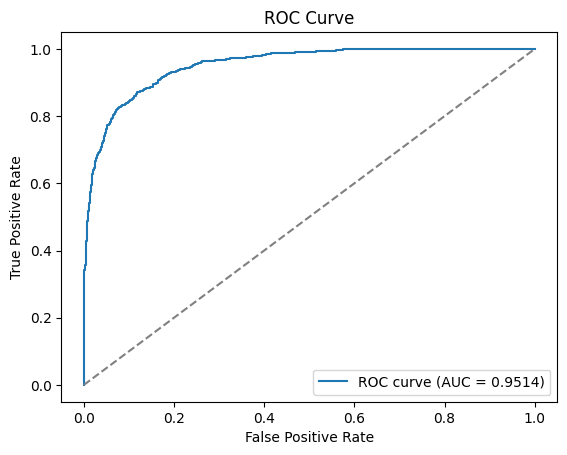

In [52]:
# Calculate ROC
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [57]:
# Set up params for randomized search (finding best hyperparams)
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
## Hyperparameter tuning
random_search.fit(X_train_scaled_logistic, y_train_logistic)

print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Cross-Validated Accuracy (RandomizedSearchCV):", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning:

The total space of parameters 42 is smaller than n_iter=50. Running 42 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters (RandomizedSearchCV): {'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None, 'C': 1}
Best Cross-Validated Accuracy (RandomizedSearchCV): 0.8696231742940604


In [72]:
best_params = {
    'C': 1,
    'class_weight': None,
    'penalty': 'l2',
    'solver': 'liblinear'
}
print("Best Parameters:", best_params)

best_logistic_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    class_weight=best_params['class_weight'],
    max_iter=1000,
    random_state=42
)
## Best model best hyperparameters

best_logistic_model.fit(X_train_scaled_logistic, y_train_logistic)

y_pred_best = best_logistic_model.predict(X_test_scaled_logistic)

accuracy_best = accuracy_score(y_test_logistic, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_logistic, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test_logistic, y_pred_best))

Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Model Accuracy: 0.8749

Confusion Matrix:
[[ 878  172]
 [ 137 1283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1050
           1       0.88      0.90      0.89      1420

    accuracy                           0.87      2470
   macro avg       0.87      0.87      0.87      2470
weighted avg       0.87      0.87      0.87      2470



##Ensemble Model:

In [73]:
y_ensemble = shuffled_df['HOME_TEAM_WINS']
X_ensemble = shuffled_df.drop(columns=['HOME_TEAM_WINS']).select_dtypes(include=['number'])
## Creating ensemble model that incorporates the votes predictions of all three models, chooses majority vote
## For example: Logistic Regression Predicts Loss, XGBoost Predicts Win, Neural Network Predicts Win - Ensemble model chooses Win (2 votes win 1 vote loss)
X_train_ensemble, X_test_ensemble, y_train_ensemble, y_test_ensemble = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled_ensemble = scaler.fit_transform(X_train_ensemble)
X_test_scaled_ensemble = scaler.transform(X_test_ensemble)
## Retrain models with consistent data

In [74]:
## From XGBoost (for predicting match outcome) earlier model
best_model_XGBoost.fit(X_train_scaled_ensemble, y_train_ensemble)

y_pred_xgb_for_ensemble = best_model_XGBoost.predict(X_test_scaled_ensemble)

## From logistic regression model earlier
best_logistic_model.fit(X_train_scaled_ensemble, y_train_ensemble)

y_pred_logistic_for_ensemble = best_logistic_model.predict(X_test_scaled_ensemble)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[04:19:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [78]:
## From neural network model earlier
best_hyperparameters = {
    'units_1': 96,
    'dropout_1': 0.4,
    'units_2': 64,
    'dropout_2': 0.3,
    'units_3': 48,
    'dropout_3': 0.2,
    'lr': 0.0006842507100027634
}

model_nn_best_ensemble = Sequential()

model_nn_best_ensemble.add(Dense(best_hyperparameters['units_1'], activation='relu', input_shape=(X_train_scaled_ensemble.shape[1],)))
model_nn_best_ensemble.add(BatchNormalization())
model_nn_best_ensemble.add(Dropout(best_hyperparameters['dropout_1']))

model_nn_best_ensemble.add(Dense(best_hyperparameters['units_2'], activation='relu'))
model_nn_best_ensemble.add(BatchNormalization())
model_nn_best_ensemble.add(Dropout(best_hyperparameters['dropout_2']))

model_nn_best_ensemble.add(Dense(best_hyperparameters['units_3'], activation='relu'))
model_nn_best_ensemble.add(BatchNormalization())
model_nn_best_ensemble.add(Dropout(best_hyperparameters['dropout_3']))

model_nn_best_ensemble.add(Dense(1, activation='sigmoid'))

model_nn_best_ensemble.compile(optimizer=Adam(learning_rate=best_hyperparameters['lr']),
              loss='binary_crossentropy', metrics=['accuracy'])

history = model_nn_best_ensemble.fit(X_train_scaled_ensemble, y_train, epochs=50, validation_data=(X_test_scaled_ensemble, y_test_ensemble))

y_pred_prob_nn_for_ensemble = model_nn_best_ensemble.predict(X_test_scaled_ensemble)
y_pred_nn_ensemble = (y_pred_prob_nn_for_ensemble > 0.5).astype(int).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6667 - loss: 0.6372 - val_accuracy: 0.8445 - val_loss: 0.3655
Epoch 2/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8072 - loss: 0.4242 - val_accuracy: 0.8668 - val_loss: 0.3090
Epoch 3/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8370 - loss: 0.3730 - val_accuracy: 0.8721 - val_loss: 0.2959
Epoch 4/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8407 - loss: 0.3667 - val_accuracy: 0.8745 - val_loss: 0.2894
Epoch 5/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8466 - loss: 0.3503 - val_accuracy: 0.8798 - val_loss: 0.2844
Epoch 6/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8522 - loss: 0.3488 - val_accuracy: 0.8765 - val_loss: 0.2871
Epoch 7/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.3451 - val_accuracy: 0.8773 - val_loss: 0.2808
Epoch 8/50
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8623 - loss: 0.3329 - val_accuracy: 

In [79]:
predictions = np.vstack((y_pred_xgb_for_ensemble, y_pred_logistic, y_pred_nn_ensemble)).T

y_pred_ensemble, _ = mode(predictions, axis=1)
y_pred_ensemble = y_pred_ensemble.flatten()

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

print("\nEnsemble Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble, target_names=['Loss', 'Win']))


Ensemble Model Accuracy: 0.8806

Ensemble Confusion Matrix:
[[ 893  157]
 [ 138 1282]]

Ensemble Classification Report:
              precision    recall  f1-score   support

        Loss       0.87      0.85      0.86      1050
         Win       0.89      0.90      0.90      1420

    accuracy                           0.88      2470
   macro avg       0.88      0.88      0.88      2470
weighted avg       0.88      0.88      0.88      2470



In [80]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_for_ensemble)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic_for_ensemble)
accuracy_nn = accuracy_score(y_test, y_pred_nn_ensemble)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")


XGBoost Accuracy: 0.8810
Logistic Regression Accuracy: 0.8749
Neural Network Accuracy: 0.8794
Ensemble Model Accuracy: 0.8806


In [84]:
# Give each prediction different weights to see if ensemble model preforms better
weights = [0.4, 0.25, 0.35]

y_pred_prob_xgb = best_model_XGBoost.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_logistic = best_logistic_model.predict_proba(X_test_scaled)[:, 1]

avg_prob = (weights[0]*y_pred_prob_xgb + weights[1]*y_pred_prob_logistic + weights[2]*y_pred_prob_nn_for_ensemble.flatten())
y_pred_weighted = (avg_prob > 0.5).astype(int)

weighted_accuracy = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Ensemble Model Accuracy: {weighted_accuracy:.4f}")

Weighted Ensemble Model Accuracy: 0.8830


In [93]:
def find_best_weights(y_true, y_probs_list, step_size=0.05):
    best_weights = None
    best_accuracy = 0.0

    weight_combinations = [
        (w1, w2, w3) for w1, w2, w3 in product(np.arange(0, 1 + step_size, step_size), repeat=3)
        if np.isclose(w1 + w2 + w3, 1.0)
    ]

    for weights in weight_combinations:
        avg_prob = sum(w * probs for w, probs in zip(weights, y_probs_list))
        y_pred_weighted = (avg_prob > 0.5).astype(int).flatten()  # Flatten predictions

        y_true_flat = y_true

        accuracy = accuracy_score(y_true_flat, y_pred_weighted)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_weights = weights

    return best_weights, best_accuracy

y_probs_list = [
    y_pred_prob_xgb,
    y_pred_prob_logistic,
    y_pred_prob_nn_for_ensemble.flatten()
]

y_test_ensemble_flat = y_test_ensemble.to_numpy().flatten()

best_weights, best_accuracy = find_best_weights(y_test_ensemble_flat, y_probs_list)

print(f"Best Weights: {best_weights}")
print(f"Best Weighted Ensemble Accuracy: {best_accuracy:.4f}")
## logistic regression not necessary, ensemble model should only incorporate XGBoost and Neural Network

Best Weights: (0.5, 0.0, 0.5)
Best Weighted Ensemble Accuracy: 0.8866
